In [1]:
import pandas as pd
import numpy as np
import random
import os
import cv2
import keras
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline
from keras_preprocessing.image import ImageDataGenerator
from keras_preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.
C:\Users\srt90\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\srt90\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\srt90\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\srt90\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_csv = pd.read_csv('train.csv')

In [4]:
train_csv.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [5]:
#Top 10 categories
train_csv['Id'].value_counts()[:10]

new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
w_700ebb4      57
w_3de579a      54
w_564a34b      51
w_fd3e556      50
w_88e4537      49
Name: Id, dtype: int64

# Data vizzzz

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

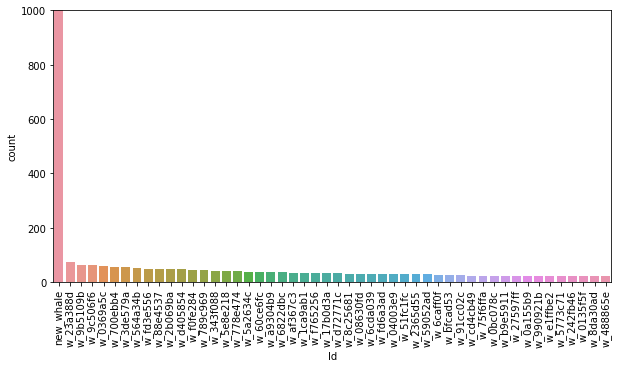

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Id', order = train_csv['Id'].value_counts()[:50].index, data = train_csv)
plt.ylim(0,1000)
plt.xticks(rotation = 90)

This Dataset is **imbalanced**, becuase each classes in the dataset are not equal in amount. So for better classification of images we need to do **Data Augumentation** to get **Balanced data** where the algorithm can better classify the images.

# Data Augumentation and Pre processing

In [7]:
# Creating a Dataframe that contains Top 10 ids

train_data = train_csv.loc[(train_csv['Id'] == 'w_23a388d') | (train_csv['Id'] == 'w_23a388d') | (train_csv['Id'] == 'w_9c506f6') | (train_csv['Id'] == 'w_0369a5c') |  (train_csv['Id'] == 'new_whale')
                          | (train_csv['Id'] == 'w_700ebb4')| (train_csv['Id'] == 'w_3de579a') | (train_csv['Id'] == 'w_564a34b') |  (train_csv['Id'] == 'w_fd3e556')|  (train_csv['Id'] == 'w_88e4537')]

In [8]:
train_data.index = range(0, len(train_data))
train_data.head()

,Image,Id
0,00050a15a.jpg,new_whale
1,0005c1ef8.jpg,new_whale
2,0006e997e.jpg,new_whale
3,000f0f2bf.jpg,new_whale
4,001d7450c.jpg,new_whale


In [9]:
train_data['Id'].value_counts()

new_whale    9664
w_23a388d      73
w_9c506f6      62
w_0369a5c      61
w_700ebb4      57
w_3de579a      54
w_564a34b      51
w_fd3e556      50
w_88e4537      49
Name: Id, dtype: int64

In [10]:
asd = []
for ids in train_csv['Id'].value_counts()[:10].index:
    asd.append(ids)

In [11]:
def labelling():
    label = {}
    for l in asd:
        la = asd.index(l)
        label[l] = la
    return label

In [12]:
qq = labelling()

In [13]:
qq

{'new_whale': 0,
 'w_23a388d': 1,
 'w_9b5109b': 2,
 'w_9c506f6': 3,
 'w_0369a5c': 4,
 'w_700ebb4': 5,
 'w_3de579a': 6,
 'w_564a34b': 7,
 'w_fd3e556': 8,
 'w_88e4537': 9}

In [14]:
def lab():
    value = []
    for ids in train_data['Id']:
        for a,b in qq.items():
            if ids == a:
                value.append(b)
    return value

In [15]:
result = lab()

In [16]:
train_data['Labels'] = result

C:\Users\srt90\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
train_data.head()

,Image,Id,Labels
0,00050a15a.jpg,new_whale,0
1,0005c1ef8.jpg,new_whale,0
2,0006e997e.jpg,new_whale,0
3,000f0f2bf.jpg,new_whale,0
4,001d7450c.jpg,new_whale,0


In [18]:
train_data['Labels'].unique()

array([0, 6, 3, 5, 4, 1, 7, 8, 9], dtype=int64)

In [19]:
Id_wd = train_data[train_data['Id'] == 'w_23a388d']
Id_wd.index = range(0, len(Id_wd))
#Id_wd.head()
Id_wb = train_data[train_data['Id'] == 'w_9b5109b']
Id_wb.index = range(0, len(Id_wb))
#Id_wb.head()
Id_w6 = train_data[train_data['Id'] == 'w_9c506f6']
Id_w6.index = range(0, len(Id_w6))
#Id_w6.head()
Id_wc = train_data[train_data['Id'] == 'w_0369a5c']
Id_wc.index = range(0, len(Id_wc))
#Id_wc.head()
Id_w4 = train_data[train_data['Id'] == 'w_700ebb4']
Id_w4.index = range(0, len(Id_w4))
#Id_w4.head()
Id_w4b = train_data[train_data['Id'] == 'w_564a34b']
Id_w4b.index = range(0, len(Id_w4b))
#Id_w4b.head()
Id_wa = train_data[train_data['Id'] == 'w_3de579a']
Id_wa.index = range(0, len(Id_wa))
#Id_wa.head()
Id_w56 = train_data[train_data['Id'] == 'w_fd3e556']
Id_w56.index = range(0, len(Id_w56))
#Id_w56.head()
Id_w7 = train_data[train_data['Id'] == 'w_88e4537']
Id_w7.index = range(0, len(Id_w7))
#Id_w7.head()

In [20]:
f1 = []
for w in Id_wd['Image']:
    f1.append(w)
f2 = []
for w1 in Id_wc['Image']:
    f2.append(w1)
f3 = []
for w2 in Id_w6['Image']:
    f3.append(w2)
f4 = []
for w3 in Id_wb['Image']:
    f4.append(w3)
f5 = []
for w in Id_w4['Image']:
    f5.append(w)
f6 = []
for w1 in Id_w4b['Image']:
    f6.append(w1)
f7 = []
for w2 in Id_wa['Image']:
    f7.append(w2)
f8 = []
for w3 in Id_w56['Image']:
    f8.append(w3)
f9 = []
for w3 in Id_w7['Image']:
    f9.append(w3)

In [21]:
print(len(f1))
print(len(f2))
print(len(f3))
print(len(f4))
print(len(f5))
print(len(f6))
print(len(f7))
print(len(f8))
print(len(f9))

73
61
62
0
57
51
54
50
49


In [22]:
#Path to the training images 
img_path = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\train'

In [23]:
#paths to augumented images of each id

r_path = 'C:/Users/srt90/Desktop/Deep learning project/r1'
r_path1 = 'C:/Users/srt90/Desktop/Deep learning project/r2'
r_path2 = 'C:/Users/srt90/Desktop/Deep learning project/r3'
r_path3 = 'C:/Users/srt90/Desktop/Deep learning project/r4'
r_path4= 'C:/Users/srt90/Desktop/Deep learning project/r5'
r_path5 = 'C:/Users/srt90/Desktop/Deep learning project/r6'
r_path6 = 'C:/Users/srt90/Desktop/Deep learning project/r7'
r_path7 = 'C:/Users/srt90/Desktop/Deep learning project/r8'
r_path8 = 'C:/Users/srt90/Desktop/Deep learning project/r9'

In [ ]:
aug_images= []
img_size1 = 124
for file in f9:
    img1 = cv2.imread(os.path.join(img_path,file))
    new_img1 = cv2.resize(img1,(img_size1,img_size1), cv2.IMREAD_GRAYSCALE)
    aug_images.append(new_img1)

In [ ]:
len(aug_images)

In [ ]:
datagen = ImageDataGenerator(rotation_range = 20, width_shift_range=0.2,
                             height_shift_range=0.2,shear_range=0.2,
                             zoom_range=0.1,horizontal_flip=0.2)

In [ ]:
agg = []
for v in range(len(aug_images)):
    aug1= aug_images[v].reshape(-1,124,124,3)
    aug1 = aug1/255
    agg.append(aug1)

In [ ]:
#Data Augumentation part

for z in range(0,2):
    print('hello')
    i = 0
    for batch in datagen.flow(ag[z],batch_size = 1,save_to_dir=t_path,save_format='jpg',save_prefix='w7'):
        print(i)
        img_plot = plt.imshow(image.img_to_array(batch[0]))
        i+=1
        plt.show()
        if i == 129:                                                                                                                                          
            break

In [25]:
path1 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r1'
wd_images = []
img_size1 = 124
for fle in os.listdir(path1):
    wd_images.append(fle)

In [26]:
path2 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r2'
wc_images = []
img_size1 = 124
for fle in os.listdir(path2):
    wc_images.append(fle)

In [27]:
path3 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r3'
w6_images = []
img_size1 = 124
for fle in os.listdir(path3):
    w6_images.append(fle)

In [28]:
path4 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r4'
wb_images = []
img_size1 = 124
for fle in os.listdir(path4):
    wb_images.append(fle)

In [29]:
path5 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r5'
w4_images = []
img_size1 = 124
for fle in os.listdir(path5):
    w4_images.append(fle)

In [30]:
path6 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r6'
w4b_images = []
img_size1 = 124
for fle in os.listdir(path6):
    w4b_images.append(fle)

In [31]:
path7 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r7'
wa_images = []
img_size1 = 124
for fle in os.listdir(path7):
    wa_images.append(fle)

In [32]:
path8 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r8'
w56_images = []
img_size1 = 124
for fle in os.listdir(path8):
    w56_images.append(fle)

In [33]:
path9 = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\r9'
w7_images = []
img_size1 = 124
for fle in os.listdir(path9):
    w7_images.append(fle)

In [34]:
print(len(wd_images))
print(len(wc_images))
print(len(w6_images))
print(len(wb_images))
print(len(w4_images))
print(len(w4b_images))
print(len(wa_images))
print(len(w56_images))
print(len(w7_images))

5940
5511
5490
5747
5202
4803
5049
4766
4622


In [35]:
Id_wd = Id_wd.append(pd.DataFrame(wd_images, columns=['Image']))
Id_wd['Id'].fillna('w_23a388d', inplace = True)
Id_wd['Labels'].fillna(5, inplace = True)
Id_wd.index = range(0, len(Id_wd))
Id_wd.head()

C:\Users\srt90\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Id,Image,Labels
0,w_23a388d,02bdec750.jpg,1.0
1,w_23a388d,02f250971.jpg,1.0
2,w_23a388d,03b6593e9.jpg,1.0
3,w_23a388d,043b78dc6.jpg,1.0
4,w_23a388d,09611f0c5.jpg,1.0


In [36]:
Id_wc = Id_wc.append(pd.DataFrame(wc_images, columns=['Image']))
Id_wc['Id'].fillna('w_0369a5c', inplace = True)
Id_wc['Labels'].fillna(4, inplace = True)
Id_wc.index = range(0, len(Id_wc))
Id_wc.head()

,Id,Image,Labels
0,w_0369a5c,00e9e5122.jpg,4.0
1,w_0369a5c,06ae83bbc.jpg,4.0
2,w_0369a5c,092ef02b8.jpg,4.0
3,w_0369a5c,12670516b.jpg,4.0
4,w_0369a5c,12f5ad5a6.jpg,4.0


In [37]:
Id_w6 = Id_w6.append(pd.DataFrame(w6_images, columns=['Image']))
Id_w6['Id'].fillna('w_9c506f6', inplace = True)
Id_w6['Labels'].fillna(2, inplace = True)
Id_w6.index = range(0, len(Id_w6))
Id_w6.head()

,Id,Image,Labels
0,w_9c506f6,00570db6b.jpg,3.0
1,w_9c506f6,13a7495d5.jpg,3.0
2,w_9c506f6,15685f504.jpg,3.0
3,w_9c506f6,158c781a5.jpg,3.0
4,w_9c506f6,16977eb66.jpg,3.0


In [38]:
Id_wb = Id_wb.append(pd.DataFrame(wb_images, columns=['Image']))
Id_wb['Id'].fillna('w_9b5109b', inplace = True)
Id_wb['Labels'].fillna(7, inplace = True)
Id_wb.index = range(0, len(Id_wb))
Id_wb.head()

,Id,Image,Labels
0,w_9b5109b,wb_0_10.jpg,7.0
1,w_9b5109b,wb_0_100.jpg,7.0
2,w_9b5109b,wb_0_1000.jpg,7.0
3,w_9b5109b,wb_0_1002.jpg,7.0
4,w_9b5109b,wb_0_1003.jpg,7.0


In [39]:
Id_w4 = Id_w4.append(pd.DataFrame(w4_images, columns=['Image']))
Id_w4['Id'].fillna('w_700ebb4', inplace = True)
Id_w4['Labels'].fillna(3, inplace = True)
Id_w4.index = range(0, len(Id_w4))
Id_w4.head()

,Id,Image,Labels
0,w_700ebb4,00910010d.jpg,5.0
1,w_700ebb4,0962efdb7.jpg,5.0
2,w_700ebb4,0c057c0a6.jpg,5.0
3,w_700ebb4,125b7d50d.jpg,5.0
4,w_700ebb4,126fc51b0.jpg,5.0


In [40]:
Id_w4b = Id_w4b.append(pd.DataFrame(w4b_images, columns=['Image']))
Id_w4b['Id'].fillna('w_564a34b', inplace = True)
Id_w4b['Labels'].fillna(6, inplace = True)
Id_w4b.index = range(0, len(Id_w4b))
Id_w4b.head()

,Id,Image,Labels
0,w_564a34b,040da527c.jpg,7.0
1,w_564a34b,0716fb02e.jpg,7.0
2,w_564a34b,223bdaa94.jpg,7.0
3,w_564a34b,252a17791.jpg,7.0
4,w_564a34b,3612c5daf.jpg,7.0


In [41]:
Id_wa = Id_wa.append(pd.DataFrame(wa_images, columns=['Image']))
Id_wa['Id'].fillna('w_3de579a', inplace = True)
Id_wa['Labels'].fillna(1, inplace = True)
Id_wa.index = range(0, len(Id_wa))
Id_wa.head()

,Id,Image,Labels
0,w_3de579a,004e8ad5b.jpg,6.0
1,w_3de579a,01598711e.jpg,6.0
2,w_3de579a,0b38cb192.jpg,6.0
3,w_3de579a,0d94bdad3.jpg,6.0
4,w_3de579a,16a7f84e7.jpg,6.0


In [42]:
Id_w56 = Id_w56.append(pd.DataFrame(w56_images, columns=['Image']))
Id_w56['Id'].fillna('w_fd3e556', inplace = True)
Id_w56['Labels'].fillna(8, inplace = True)
Id_w56.index = range(0, len(Id_w56))
Id_w56.head()

,Id,Image,Labels
0,w_fd3e556,0779b9586.jpg,8.0
1,w_fd3e556,0b92d79c0.jpg,8.0
2,w_fd3e556,0d3e8320a.jpg,8.0
3,w_fd3e556,16666fe8c.jpg,8.0
4,w_fd3e556,175374a41.jpg,8.0


In [43]:
Id_w7 = Id_w7.append(pd.DataFrame(w7_images, columns=['Image']))
Id_w7['Id'].fillna('w_88e4537', inplace = True)
Id_w7['Labels'].fillna(9, inplace = True)
Id_w7.index = range(0, len(Id_w7))
Id_w7.head()

,Id,Image,Labels
0,w_88e4537,0988114af.jpg,9.0
1,w_88e4537,0dad7f7d5.jpg,9.0
2,w_88e4537,11835e311.jpg,9.0
3,w_88e4537,1acc3891c.jpg,9.0
4,w_88e4537,1eef410a0.jpg,9.0


In [44]:
new_whale = train_data[train_data['Id'] == 'new_whale']
new_whale.index = range(0, len(new_whale))

In [45]:
fs = [new_whale,Id_w6,Id_wb,Id_wc,Id_wd,Id_w4,Id_w4b,Id_w56,Id_w7,Id_wa]
Final_data = pd.concat(fs)
Final_data.index = range(len(Final_data))
Final_data.head()

C:\Users\srt90\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Id,Image,Labels
0,new_whale,00050a15a.jpg,0.0
1,new_whale,0005c1ef8.jpg,0.0
2,new_whale,0006e997e.jpg,0.0
3,new_whale,000f0f2bf.jpg,0.0
4,new_whale,001d7450c.jpg,0.0


In [46]:
Final_data['Id'].value_counts()

new_whale    9664
w_23a388d    6013
w_9b5109b    5747
w_0369a5c    5572
w_9c506f6    5552
w_700ebb4    5259
w_3de579a    5103
w_564a34b    4854
w_fd3e556    4816
w_88e4537    4671
Name: Id, dtype: int64

In [47]:
Final_data['Labels'] = Final_data['Labels'].apply(lambda x: int(x))

In [48]:
Final_data.head()

,Id,Image,Labels
0,new_whale,00050a15a.jpg,0
1,new_whale,0005c1ef8.jpg,0
2,new_whale,0006e997e.jpg,0
3,new_whale,000f0f2bf.jpg,0
4,new_whale,001d7450c.jpg,0


In [49]:
imges = []
for im in Final_data['Image']:
    imges.append(im)

In [50]:
len(imges)

57251

In [ ]:
#Resizing the images
pathh = 'C:\\Users\\srt90\\Desktop\\Deep learning project\\train1'
train_images = []
img_size = 124
for file in imges:
    img1 = cv2.imread(os.path.join(pathh,file), cv2.IMREAD_GRAYSCALE)
    new_img = cv2.resize(img1,(img_size,img_size))
    train_images.append(new_img)
        

In [51]:
labels = []
for l in Final_data['Labels']:
    labels.append(int(l))

In [ ]:
X = []
y = []

In [ ]:
for a in train_images:
    X.append(a)
for b in labels:
    y.append(b)

In [ ]:
def merge(l1,l2):
    m = list(zip(l1,l2))
    return m

In [ ]:
training_images = merge(X,y)

In [ ]:
x_train = []
y_train = []

In [ ]:
for f,l in training_images:
    x_train.append(f)
    y_train.append(l)

In [ ]:
#last value in reshape refers to gray scale (1)
x_train = np.array(x_train).reshape(-1,img_size,img_size,1)

In [ ]:
y_train = np.array(y_train)

In [ ]:
# Saving the train data
#np.save('x_train.npy', x_train)
#np.save('y_train.npy', y_train)